In [127]:
import pandas as pd
import seaborn as sns
import numpy as np

import ast

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [4]:
# _columns.csv
columns_data = pd.read_csv("archive/_columns.csv")
columns_data

,ColumnName,ColumnDescription
0,Address,website address the data is scraped from \n
1,League,League or Tournament the match took place in \n
2,Year,Year the match took place in \n
3,Season,Spring or Summer depending on which half of th...
4,Type,"Season, Playoffs, Regional, or International m..."
5,blueTeamTag,Blue Team's tag name (ex. Team SoloMid is TSM...
6,bResult,Result of the match for Blue Team - 1 is a wi...
7,rResult,Result of the match for Red Team - 1 is a win...
8,redTeamTag,Red Team's Tag Name (ex. Team SoloMid is TSM) \n
9,gamelength,Game length in minutes \n


In [5]:
# LeagueofLegends.csv
# Correlacionar o tempo medio das partida com os campeo
# Definir bem as hipoteses
# Explicar bem a analise
# Diversificar tipos de plots - Contribuir com a analise

lol_data = pd.read_csv("archive/LeagueofLegends.csv")
lol_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,goldblue,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds,goldred,rKills,rTowers,rInhibs,rDragons,rBarons,rHeralds,blueTop,blueTopChamp,goldblueTop,blueJungle,blueJungleChamp,goldblueJungle,blueMiddle,blueMiddleChamp,goldblueMiddle,blueADC,blueADCChamp,goldblueADC,blueSupport,blueSupportChamp,goldblueSupport,blueBans,redTop,redTopChamp,goldredTop,redJungle,redJungleChamp,goldredJungle,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...","[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]","[[37.267, None]]",[],[],"[2415, 2415, 2725, 3952, 5336, 6602, 7900, 945...","[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...","[[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...",[],"[[17.14, None], [30.934, None], [24.641, None]]",[[29.954]],[],Dyrus,Irelia,"[475, 475, 532, 687, 893, 1058, 1172, 1471, 18...",Santorin,RekSai,"[475, 475, 532, 870, 1049, 1276, 1596, 1815, 2...",Bjergsen,Ahri,"[475, 475, 532, 807, 1102, 1307, 1651, 1950, 2...",WildTurtle,Jinx,"[475, 475, 532, 797, 1127, 1453, 1766, 2044, 2...",Lustboy,Janna,"[515, 515, 583, 726, 897, 1077, 1227, 1381, 15...","['Rumble', 'Kassadin', 'Lissandra']",Balls,Gnar,"[475, 475, 532, 728, 958, 1284, 1526, 1912, 21...",Meteos,Elise,"[475, 475, 532, 898, 1192, 1429, 1819, 2107, 2...",Hai,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...","[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...",[],"[[32.545, None], [26.177, None], [19.119, None]]",[[29.255]],[],"[2415, 2415, 2731, 4126, 5364, 6560, 7789, 893...","[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...","[[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...","[[36.813, 'MID_LANE']]","[[12.264, None]]",[],[],Cris,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2...",Impaler,Rengar,"[475, 475, 532, 895, 1176, 1334, 1447, 1859, 2...",Jesiz,Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...",Mash,Caitlyn,"[475, 475, 532, 856, 1182, 1468, 1653, 1890, 2...",Sheep,Leona,"[515, 515, 577, 750, 924, 1073, 1239, 1392, 15...","['Kassadin', 'Sivir', 'Lissandra']",Gamsu,Irelia,"[475, 475, 532, 811, 1042, 1237, 1625, 1852, 2...",Crumbzz,JarvanIV,"[475, 475, 532, 909, 1105, 1423, 1536, 1732, 1...",Shiphtur,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...","[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...","[[24.577, None], [37.867, None], [30.87, None]...",[[35.144]],[],"[2415, 2415, 2716, 3854, 4899, 6199, 7520, 859...","[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...","[[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...",[],[],[],[],Flaresz,Renekton,"[475, 475, 533, 673, 828, 1075, 1428, 1775, 21...",ShorterACE,Rengar,"[475, 475, 543, 836, 1041, 1261, 1568, 2002, 2...",Pobelter,Fizz,"[475, 475, 533, 756, 1065, 1368, 2056, 2237, 2...",Altec,Sivir,"[475, 475, 533, 811, 1130

In [6]:
# bans.csv

# Address - website address the data is scraped from
# Team - 'blueBans' or 'redBans'
# ban_1 ... ban_5 - banned champion

bans_data = pd.read_csv("archive/bans.csv")
bans_data.head()

,Address,Team,ban_1,ban_2,ban_3,ban_4,ban_5
0,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Rumble,Kassadin,Lissandra,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Kassadin,Sivir,Lissandra,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,JarvanIV,Lissandra,Kassadin,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Annie,Lissandra,Kassadin,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Irelia,Pantheon,Kassadin,NaN,NaN


In [7]:
# gold.csv

# Address - website address the data is scraped from
# Type - ['golddiff' 'goldblue' 'goldred' 'goldblueTop' 'goldblueJungle'
# 'goldblueMiddle' 'goldblueADC' 'goldblueSupport' 'goldredTop'
# 'goldredJungle' 'goldredMiddle' 'goldredADC' 'goldredSupport']
# min_1 ... min_95 - game time register

gold_data = pd.read_csv("archive/gold.csv")
gold_data.head()

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80,min_81,min_82,min_83,min_84,min_85,min_86,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,1527.0,1647.0,1847.0,3750.0,4719.0,3561.0,3367.0,2886.0,2906.0,4411.0,4473.0,4639.0,4762.0,4686.0,6057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,415.0,1876.0,1244.0,2130.0,2431.0,680.0,1520.0,949.0,1894.0,2644.0,3394.0,3726.0,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,5865.0,6993.0,7049.0,7029.0,7047.0,7160.0,7081.0,7582.0,9917.0,10337.0,9823.0,12307.0,13201.0,13924.0,13915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,1278.0,1240.0,-664.0,-1195.0,-1157.0,-2161.0,-2504.0,-3873.0,-3688.0,-3801.0,-3668.0,-3612.0,-5071.0,-2825.0,-1464.0,-4507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,1265.0,2526.0,3890.0,4319.0,5121.0,5140.0,5141.0,6866.0,9517.0,11322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# kills.csv
kills_data = pd.read_csv("archive/kills.csv")
kills_data.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


In [9]:
# matchinfo.csv
matchinfo_data = pd.read_csv("archive/matchinfo.csv")
matchinfo_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [10]:
# monsters.csv
monsters_data = pd.read_csv("archive/monsters.csv")
monsters_data.head()

,Address,Team,Time,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267,DRAGON
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545,DRAGON
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177,DRAGON
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119,DRAGON
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577,DRAGON


In [11]:
# structures.csv
structures_data = pd.read_csv("archive/structures.csv")
structures_data.head()

,Address,Team,Time,Lane,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,27.542,MID_LANE,BASE_TURRET
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,39.269,MID_LANE,NEXUS_TURRET
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.583,BOT_LANE,INNER_TURRET
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,TOP_LANE,INNER_TURRET
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,16.556,BOT_LANE,OUTER_TURRET


## Campeões mais pickados por line de cada ano

columns_to_filter = ['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag',
                     'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons',
                     'bHeralds', 'goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds',
                     'blueTop', 'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp', 'goldblueJungle',
                     'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle', 'blueADC', 'blueADCChamp', 'goldblueADC',
                     'blueSupport', 'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop', 'redTopChamp',
                     'goldredTop', 'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle', 'redMiddleChamp',
                     'goldredMiddle', 'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
                     'goldredSupport', 'redBans', 'Address']

In [12]:
# Anos disponiveis

years = lol_data['Year'].unique()
ligas = lol_data['League'].unique()

years.sort()
print(years)
print(ligas)

[2014 2015 2016 2017 2018]
['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'CLS' 'LLN' 'LJL' 'LCL'
 'WC' 'MSI' 'IEM' 'RR']


In [13]:
columns_to_filter = ['League', 'Year',
                     'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp', 'blueTopChamp', 'blueJungleChamp',
                     'redMiddleChamp',  'redADCChamp',  'redSupportChamp',  'redTopChamp',  'redJungleChamp',
                     'Address']

champions_df = lol_data[columns_to_filter]

champions_df.head()

,League,Year,blueMiddleChamp,blueADCChamp,blueSupportChamp,blueTopChamp,blueJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp,redTopChamp,redJungleChamp,Address
0,NALCS,2015,Ahri,Jinx,Janna,Irelia,RekSai,Fizz,Sivir,Thresh,Gnar,Elise,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Ahri,Caitlyn,Leona,Gnar,Rengar,Azir,Corki,Annie,Irelia,JarvanIV,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Fizz,Sivir,Annie,Renekton,Rengar,Azir,Corki,Janna,Sion,LeeSin,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Leblanc,Sivir,Thresh,Irelia,JarvanIV,Lulu,KogMaw,Janna,Gnar,Nunu,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Lissandra,Tristana,Janna,Gnar,JarvanIV,Lulu,Corki,Annie,Sion,RekSai,http://matchhistory.na.leagueoflegends.com/en/...


In [14]:
years = [2014,2015,2016,2017,2018]

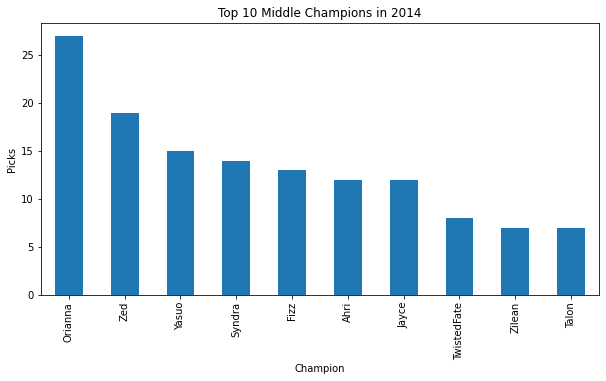

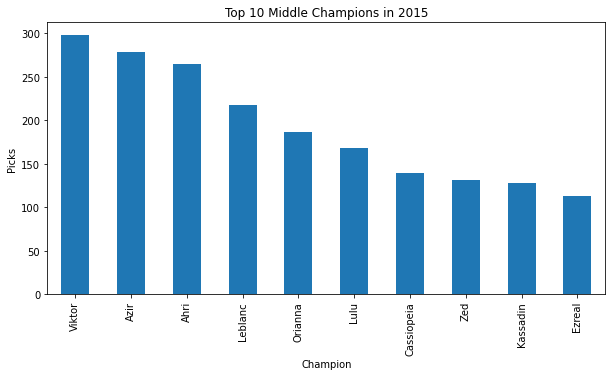

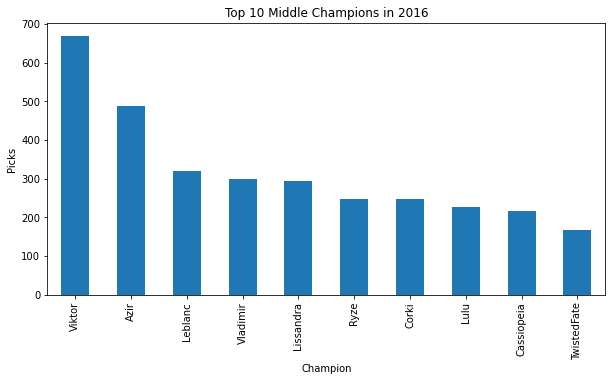

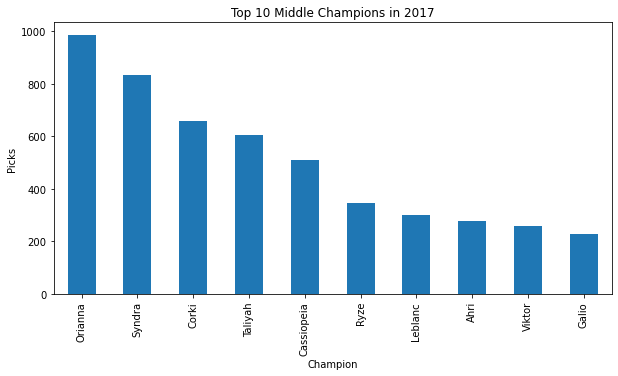

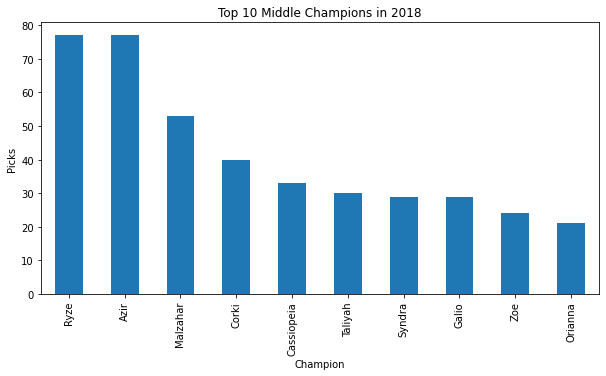

In [15]:
role = 'Middle'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()
    

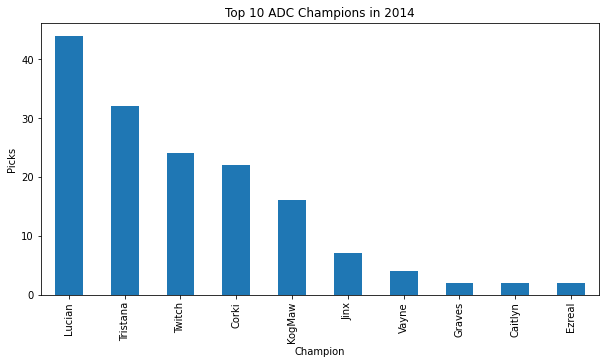

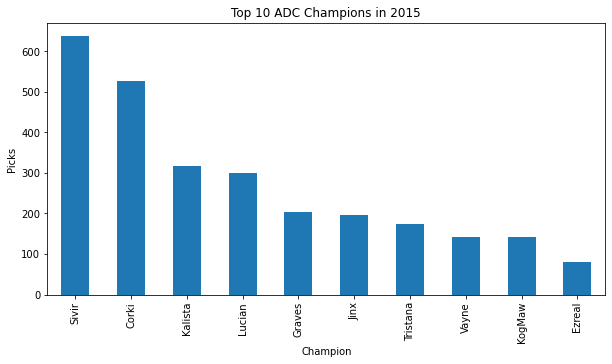

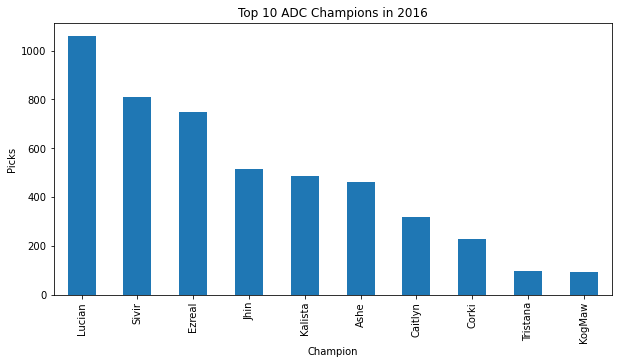

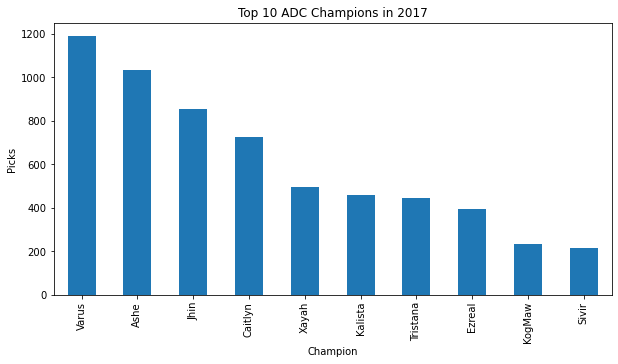

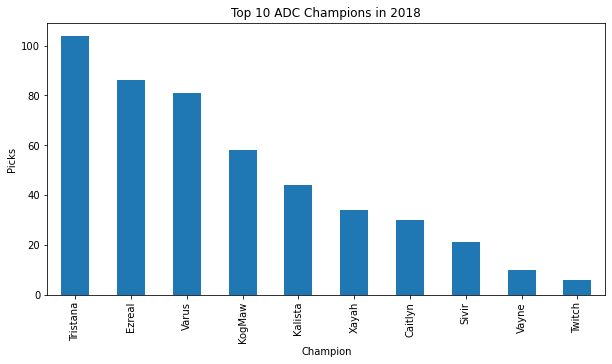

In [16]:
role = 'ADC'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

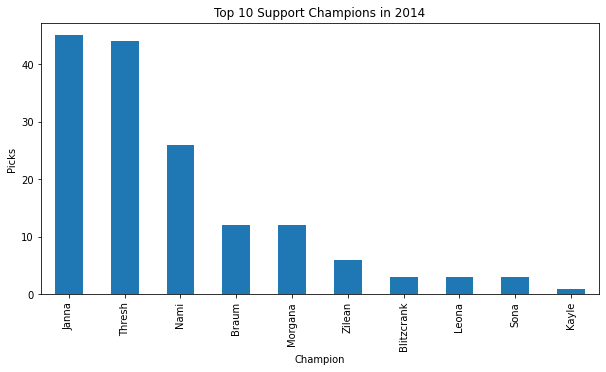

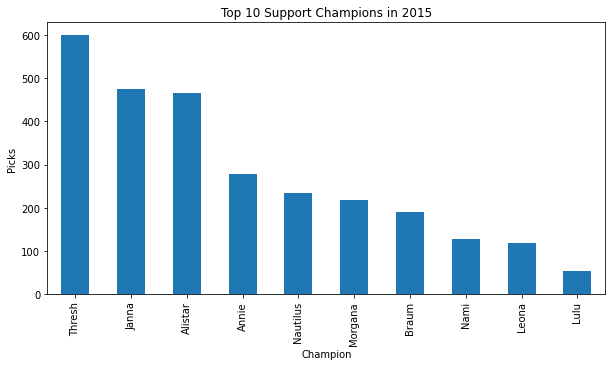

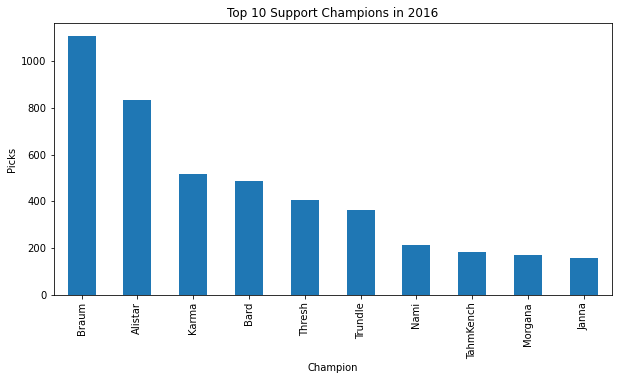

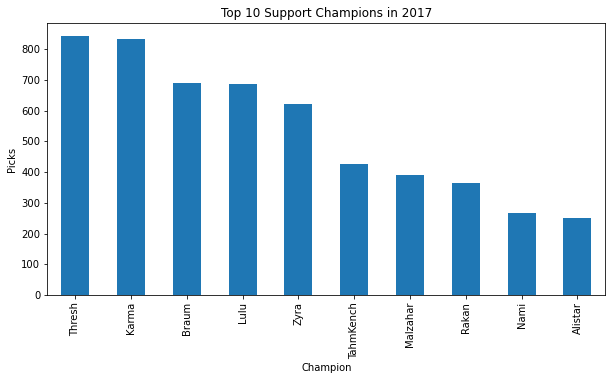

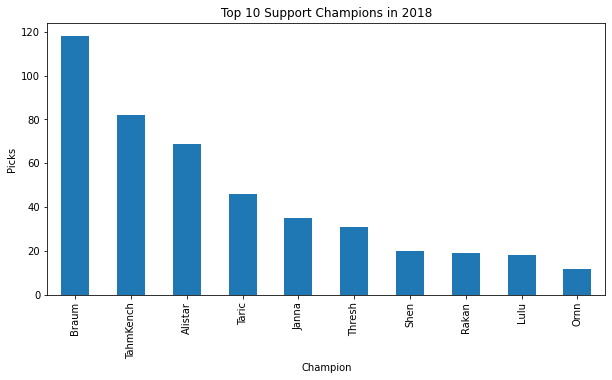

In [17]:
role = 'Support'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

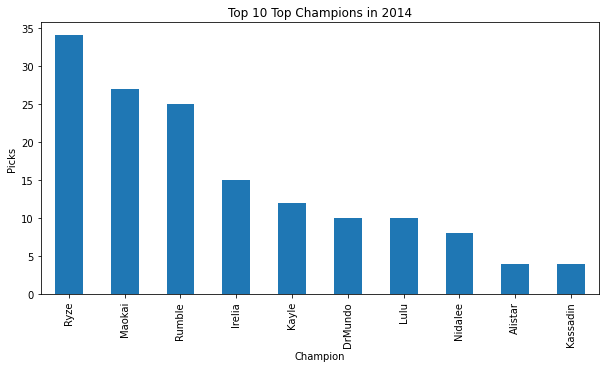

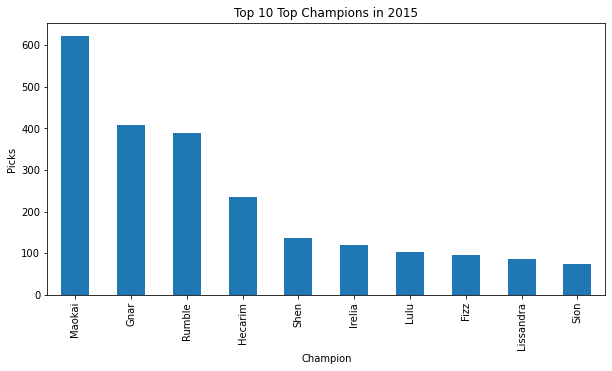

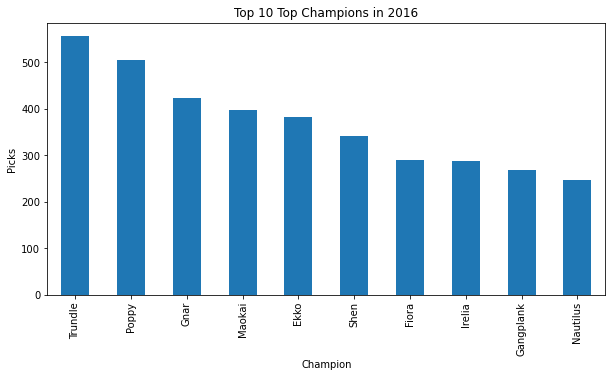

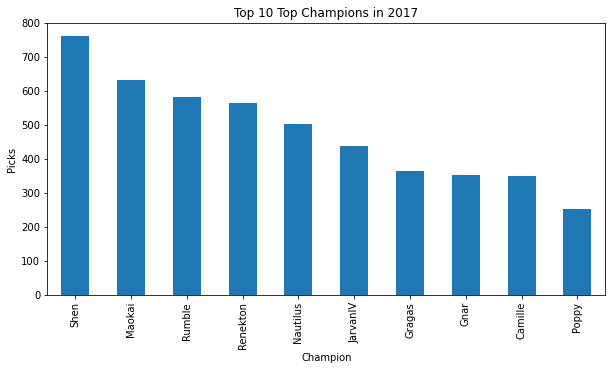

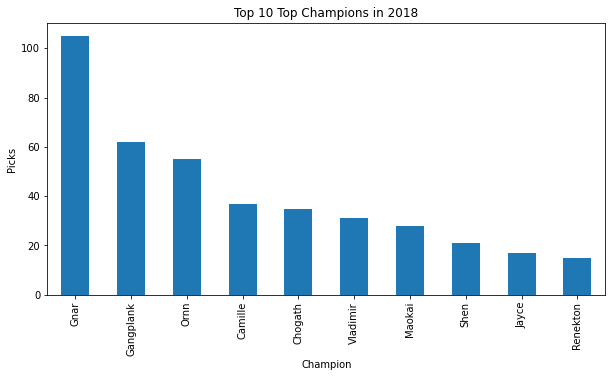

In [18]:
role = 'Top'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    top_champions = data.value_counts().nlargest(10)

    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

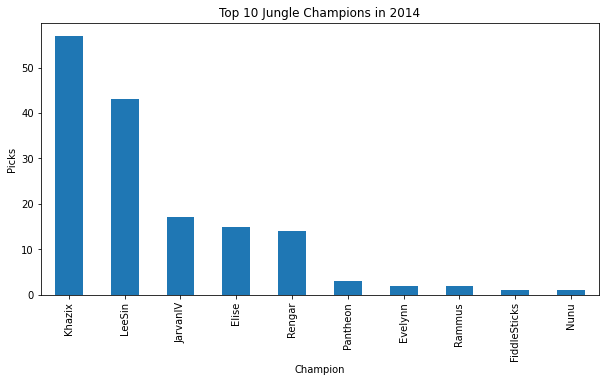

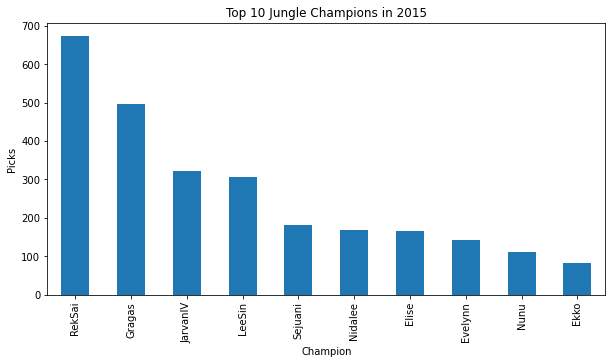

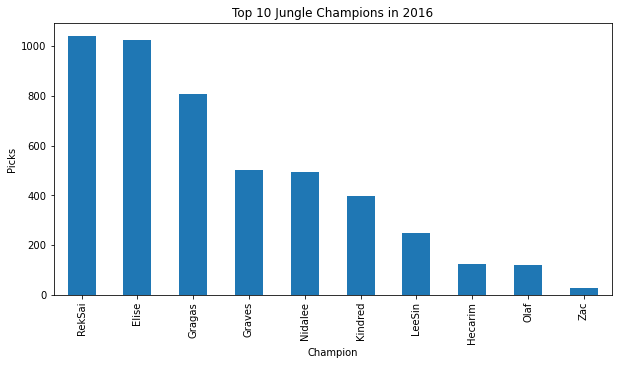

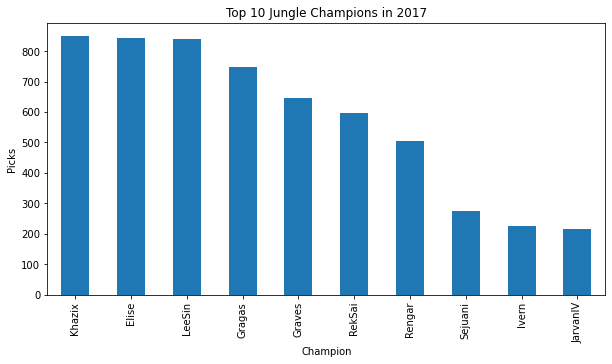

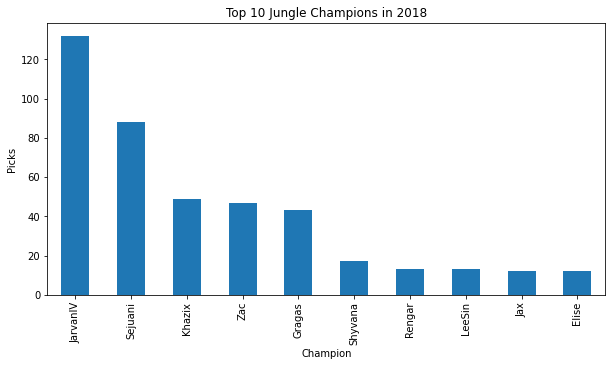

In [19]:
role = 'Jungle'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    top_champions = data.value_counts().nlargest(10)

    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

## Hipotese 1: O League Of Legends vem se tornando um jogo cada vez mais acelerado.

Como jogador desde 2015, tenho a impressão de que a cada ano que passa a Riot Games ( empresa responsável pelo LOL ) realiza mudanças no jogo que o tornam cada vez mais acelerado.


### Analisando o tempo da partida

In [34]:
mean_game_length_by_year = lol_data.groupby('Year')['gamelength'].mean()
print(mean_game_length_by_year)

Year
2014    36.653846
2015    38.331551
2016    37.040096
2017    36.358502
2018    37.643154
Name: gamelength, dtype: float64


In [37]:
median_game_lenght_by_year = lol_data.groupby('Year')['gamelength'].median()
print(median_game_lenght_by_year)

Year
2014    36.0
2015    38.0
2016    36.0
2017    35.0
2018    36.0
Name: gamelength, dtype: float64


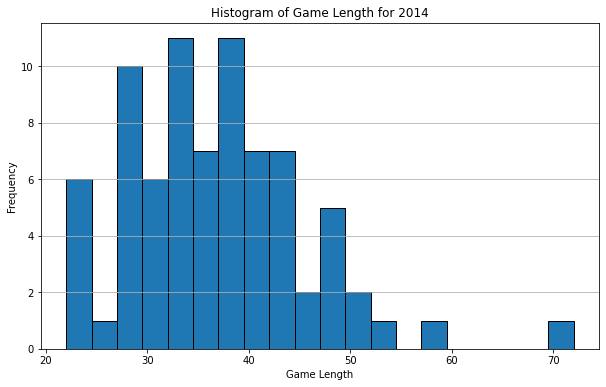

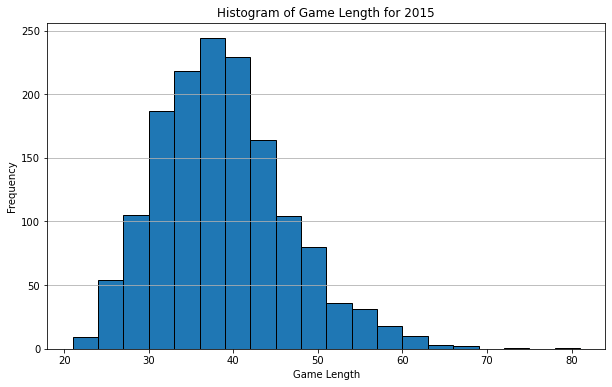

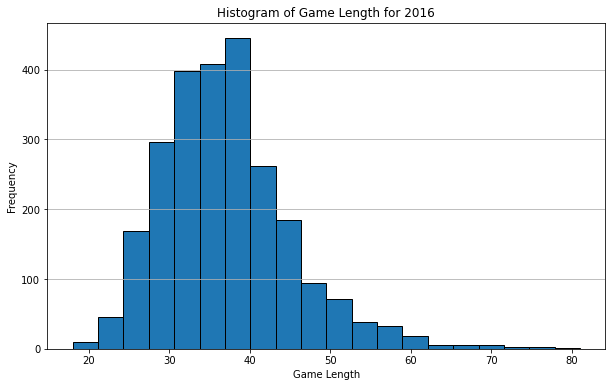

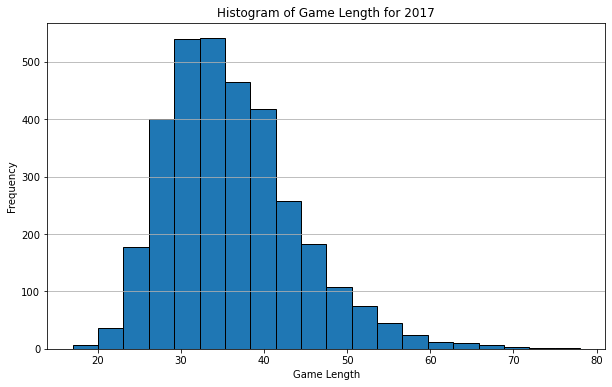

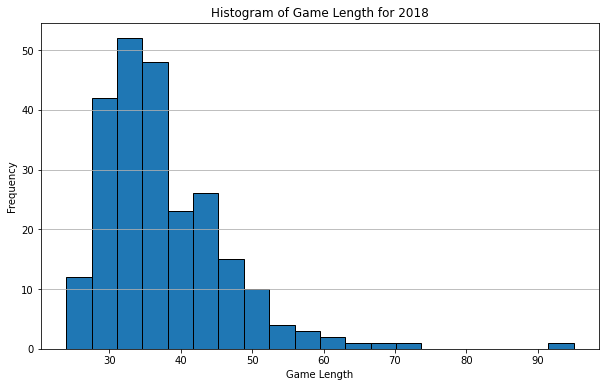

In [202]:
years.sort()
for year in years:
    plt.figure(figsize=(10, 6))
    lol_data[lol_data['Year'] == year]['gamelength'].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Histogram of Game Length for {year}')
    plt.xlabel('Game Length')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

### Analisando a diferença de ouro final da partida

In [77]:
print(lol_data.loc[1, 'golddiff'])

[0, 0, -26, -18, 147, 237, -152, 18, 88, -242, 102, 117, 802, 1420, 1394, 1301, 1489, 1563, 1368, 1105, 205, 192, 587, 377, 667, 415, 1876, 1244, 2130, 2431, 680, 1520, 949, 1894, 2644, 3394, 3726, 1165]


In [69]:
final_gold_diff = lol_data.copy()

#Pegando o ultimo valor ( diferenca de gold no final da partida )

final_gold_diff = lol_data.copy()
final_gold_diff['golddiff'] = final_gold_diff['golddiff'].apply(
    lambda x: ast.literal_eval(x)[-1] if isinstance(x, str) and len(ast.literal_eval(x)) > 0 else None
)

final_gold_diff = final_gold_diff[['Year', 'golddiff']]
final_gold_diff.head()

,Year,golddiff
0,2015,6057
1,2015,1165
2,2015,13915
3,2015,-4507
4,2015,11322


In [71]:
# Modularizando 'golddiff' pois nao importa se for red ou blue side
final_gold_diff['golddiff'] = final_gold_diff['golddiff'].abs()

# Calculando a média, mediana e desvio padrão de 'golddiff' por ano
mean_gold_diff = final_gold_diff.groupby('Year')['golddiff'].mean()
median_gold_diff = final_gold_diff.groupby('Year')['golddiff'].median()
std_gold_diff = final_gold_diff.groupby('Year')['golddiff'].std()

summary_gold_diff = pd.DataFrame({
    'Mean Gold Diff': mean_gold_diff,
    'Median Gold Diff': median_gold_diff,
    'Standard Deviation Gold Diff': std_gold_diff,
})

print(summary_gold_diff)

      Mean Gold Diff  Median Gold Diff  Standard Deviation Gold Diff
Year                                                                
2014    14521.564103           15313.5                   5473.192026
2015    11297.500668           11697.5                   4891.880646
2016     9993.021251           10268.0                   4496.495373
2017    10162.898520           10612.0                   4384.298270
2018     9698.282158            9985.0                   4467.834800


### Analisando as kills

In [92]:
# Convert 'bKills' and 'rKills' from string to list
a = ast.literal_eval(lol_data.loc[0, 'bKills'])
b = ast.literal_eval(lol_data.loc[0, 'rKills'])

# Print the length of 'a' and 'b'
print(len(a), len(b))

16 9


In [93]:
# Convert 'bKills' from string to list
lol_kills = lol_data.copy()
lol_kills['bKills'] = lol_kills['bKills'].apply(ast.literal_eval)
lol_kills['rKills'] = lol_kills['rKills'].apply(ast.literal_eval)

# Count the number of kills
lol_kills['kill_count'] = lol_kills['bKills'].apply(len) + lol_kills['rKills'].apply(len)

total_kills = lol_kills[['Year', 'kill_count']]

total_kills.head()

,Year,kill_count
0,2015,25
1,2015,19
2,2015,30
3,2015,31
4,2015,32


In [95]:
# Calculando a média, mediana e desvio padrão de 'kills' por ano
mean_total_kills = total_kills.groupby('Year')['kill_count'].mean()
median_total_kills = total_kills.groupby('Year')['kill_count'].median()
std_total_kills = total_kills.groupby('Year')['kill_count'].std()

summary_total_kills = pd.DataFrame({
    'Mean total_kills': mean_total_kills,
    'Median total_kills': median_total_kills,
    'Standard Deviation total_kills': std_total_kills,
})

print(summary_total_kills)

      Mean total_kills  Median total_kills  Standard Deviation total_kills
Year                                                                      
2014         28.641026                30.0                        9.928281
2015         27.849599                27.0                        9.563628
2016         23.884924                23.0                        8.673051
2017         25.018423                24.0                        9.105622
2018         19.311203                19.0                        7.152406


In [96]:
import datashader as ds
from datashader import transfer_functions as tf

In [98]:
df = kills_data.copy()
df = df.drop(['Address', 'Team', 'Victim', 'Killer', 'Assist_1', 'Assist_2', 'Assist_3', 'Assist_4'], axis=1)
df = df.rename(columns={'Time': 'time'})
df = df.loc[df.x_pos != 'TooEarly']
df = df.loc[df.x_pos.notnull()]
df.x_pos = df.x_pos.apply(lambda x: int(x))
df.y_pos = df.y_pos.apply(lambda y: int(y))

df.head()

,time,x_pos,y_pos
0,10.820,9229,8469
1,16.286,13908,5960
2,18.733,8281,7889
3,18.880,8522,8895
4,27.005,8902,7643


In [111]:
# Set 'Address' as index for both dataframes
df1 = kills_data.copy()
df2 = lol_data.copy()

# df1.info() 191069 entries
# df2.info() 7620 entries

df1.set_index('Address', inplace=True)
df2.set_index('Address', inplace=True)

# Merge the dataframes on the index ('Address')
kills_with_year = df1.merge(df2['Year'], left_index=True, right_index=True)

# merged_df.info() 191069 entries
kills_with_year = kills_with_year.reset_index()
kills_with_year = kills_with_year[['Year', 'Team', 'x_pos', 'y_pos']]
kills_with_year.head()

,Year,Team,x_pos,y_pos
0,2017,bKills,5382,13984
1,2017,bKills,6919,13542
2,2017,bKills,7952,8297
3,2017,bKills,7038,8316
4,2017,bKills,8020,12168


In [115]:
kills_years = kills_with_year['Year'].unique()
kills_years.sort()
kills_years

array([2014, 2015, 2016, 2017, 2018])

In [199]:
s_years = {2014: 100, 2015: 1, 2016: 0.1, 2017: 0.1, 2018: 50}

In [200]:
kills_with_year['x_pos'] = pd.to_numeric(kills_with_year['x_pos'], errors='coerce')
kills_with_year['y_pos'] = pd.to_numeric(kills_with_year['y_pos'], errors='coerce')

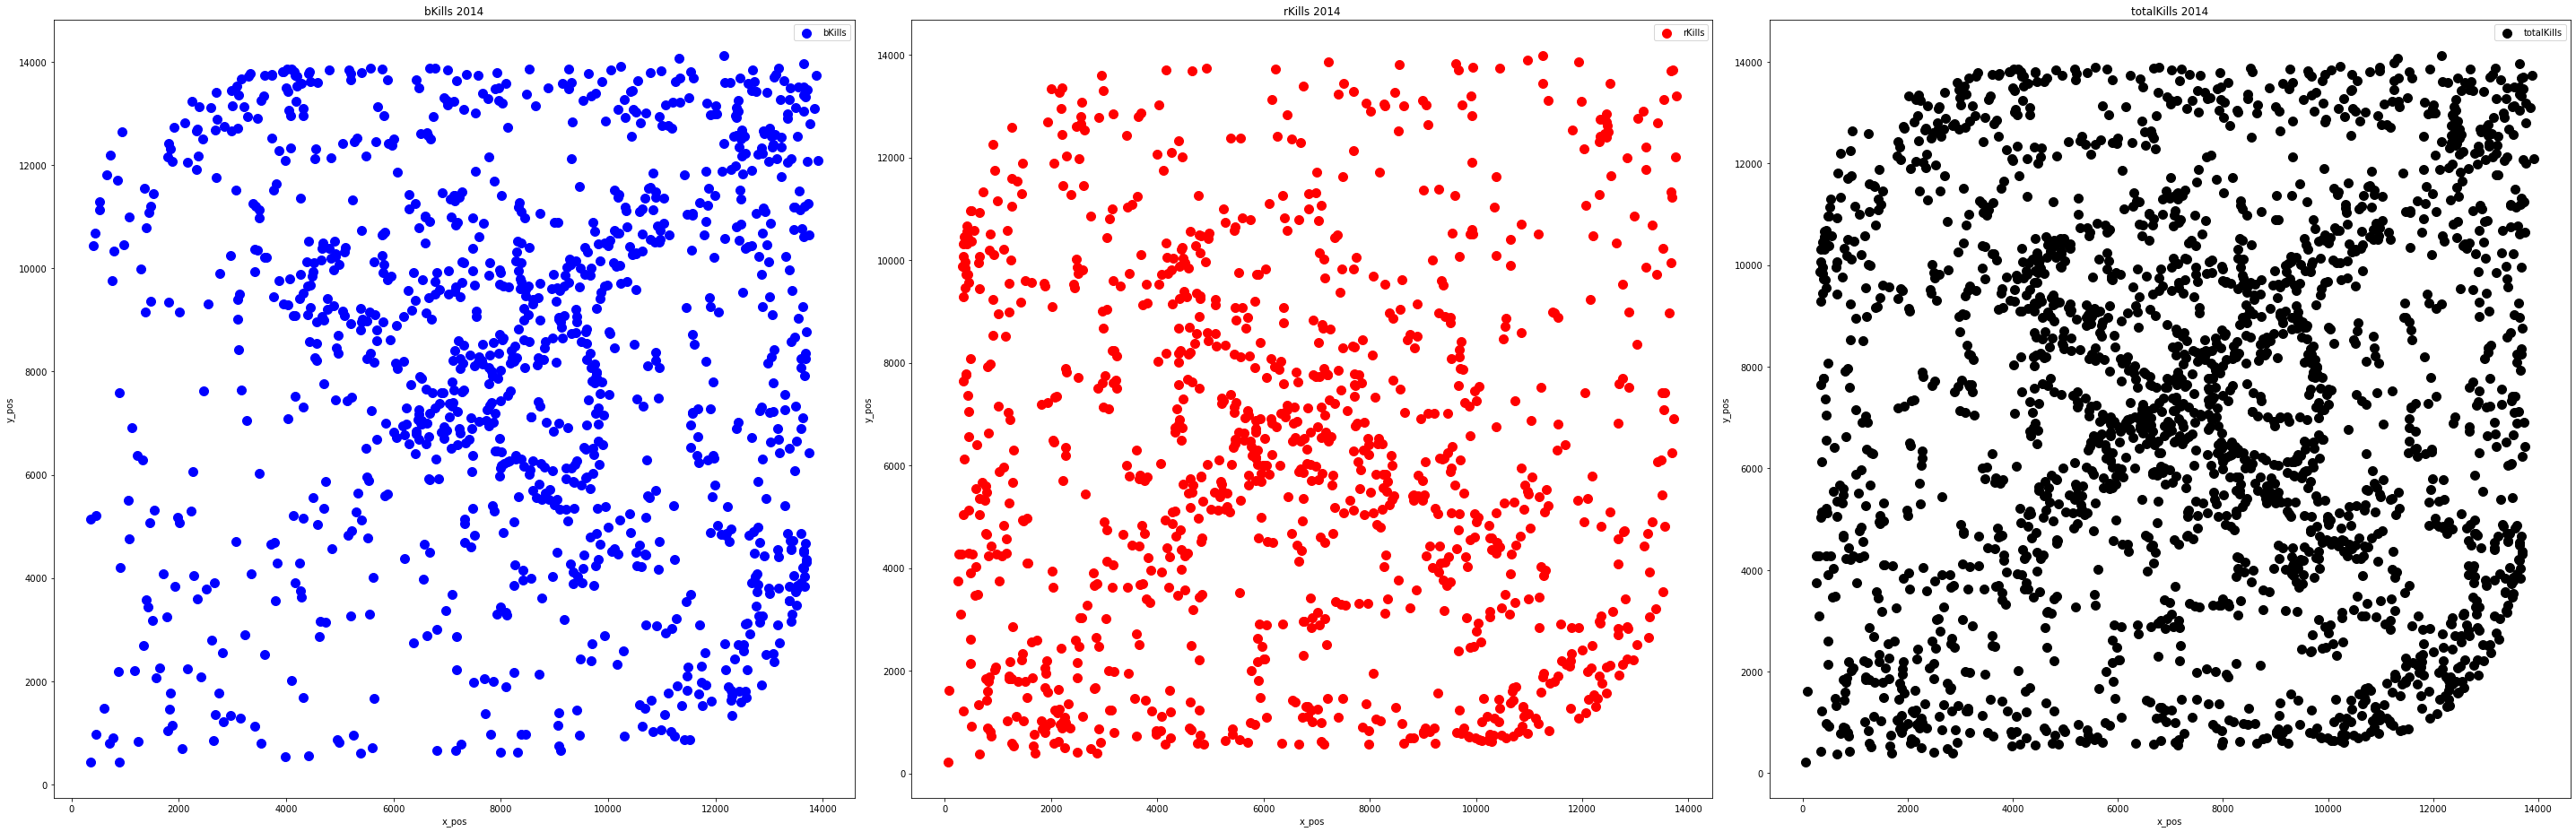

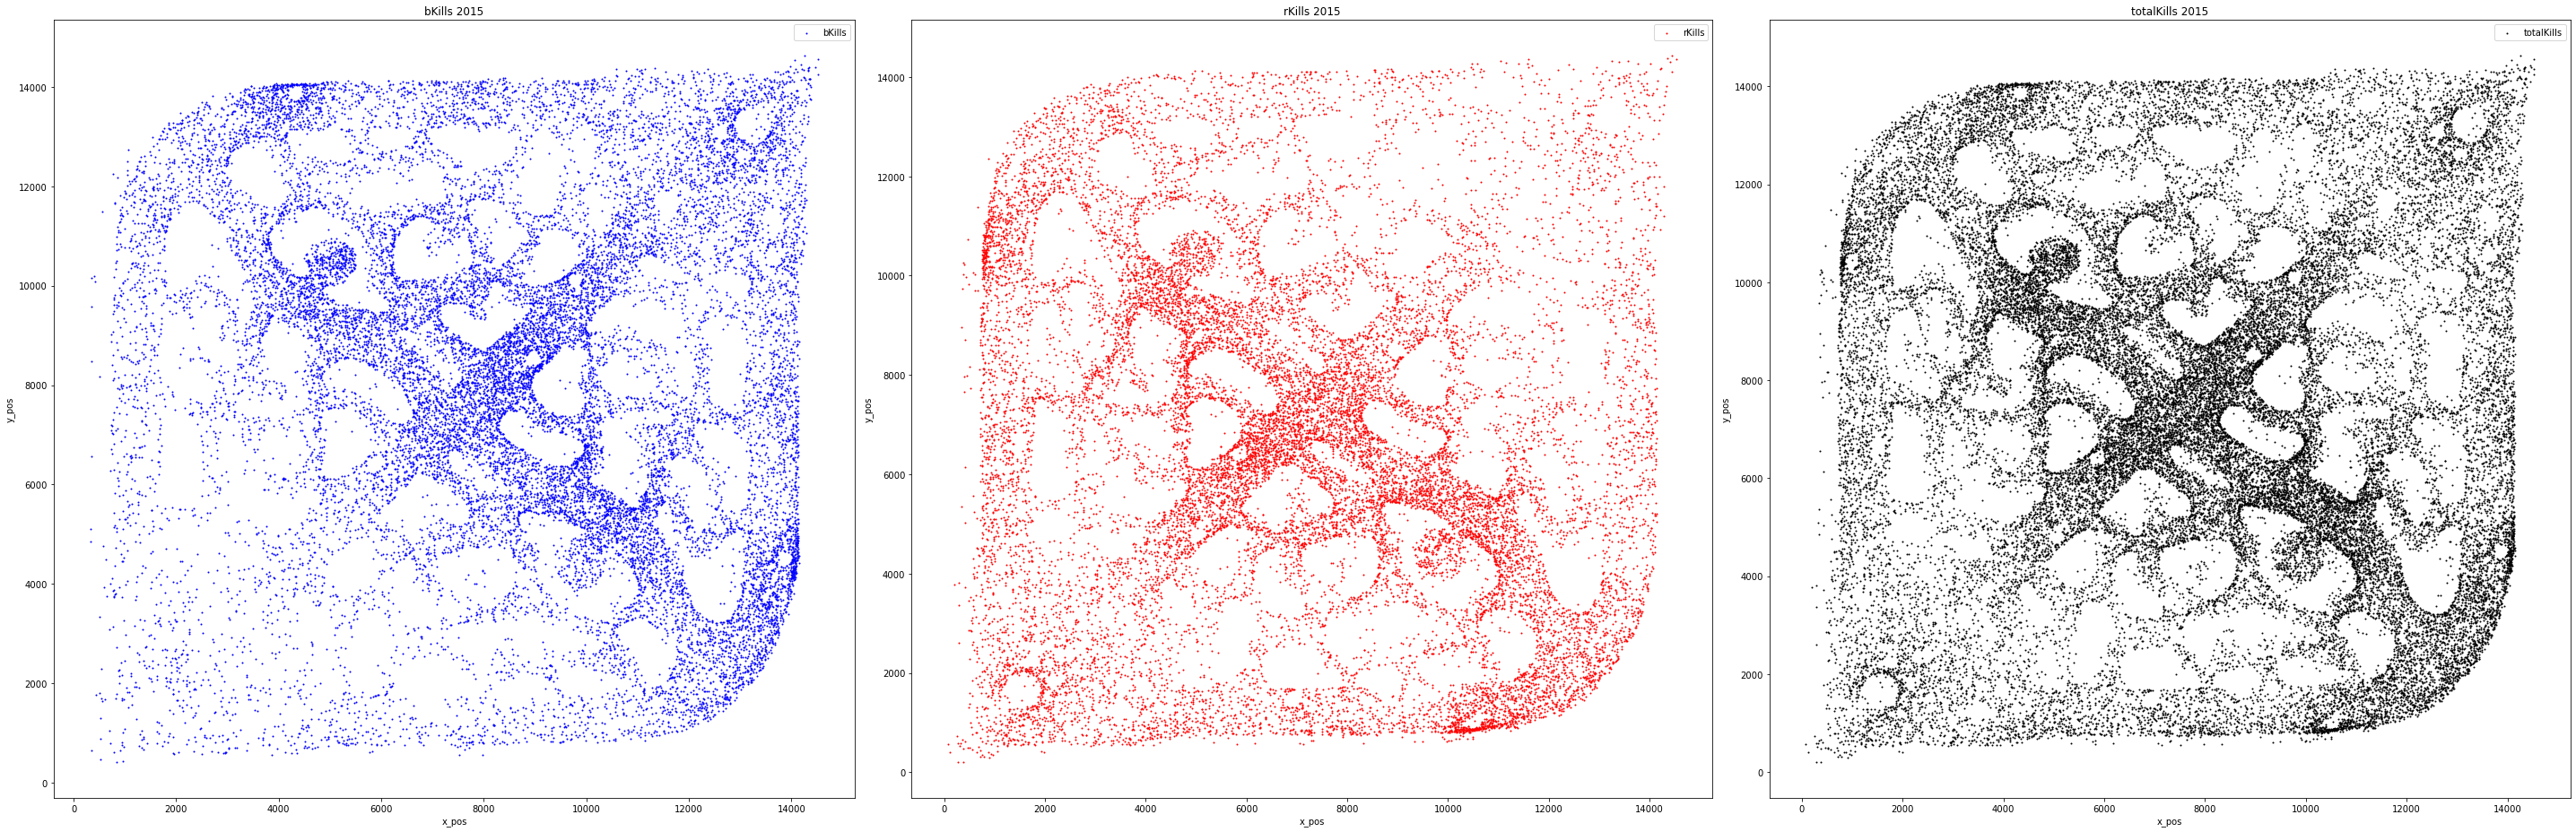

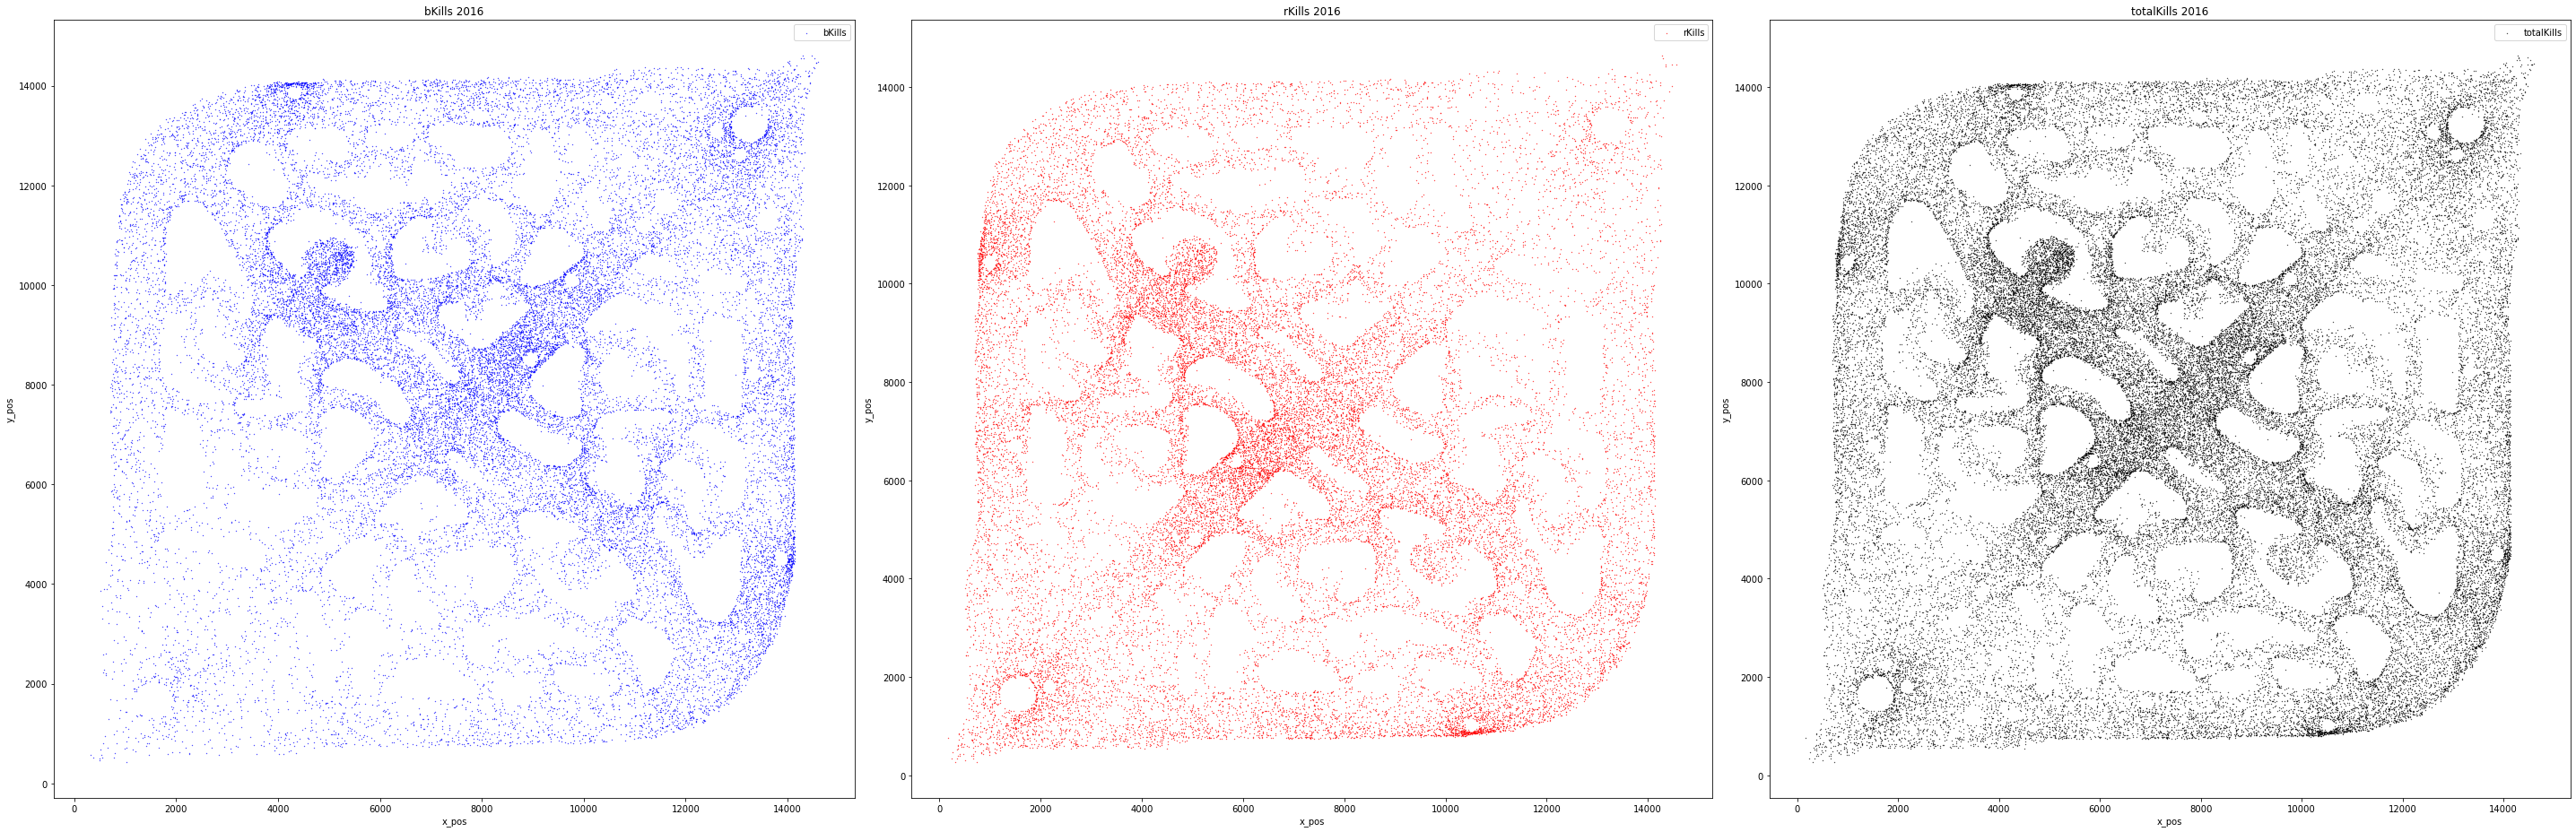

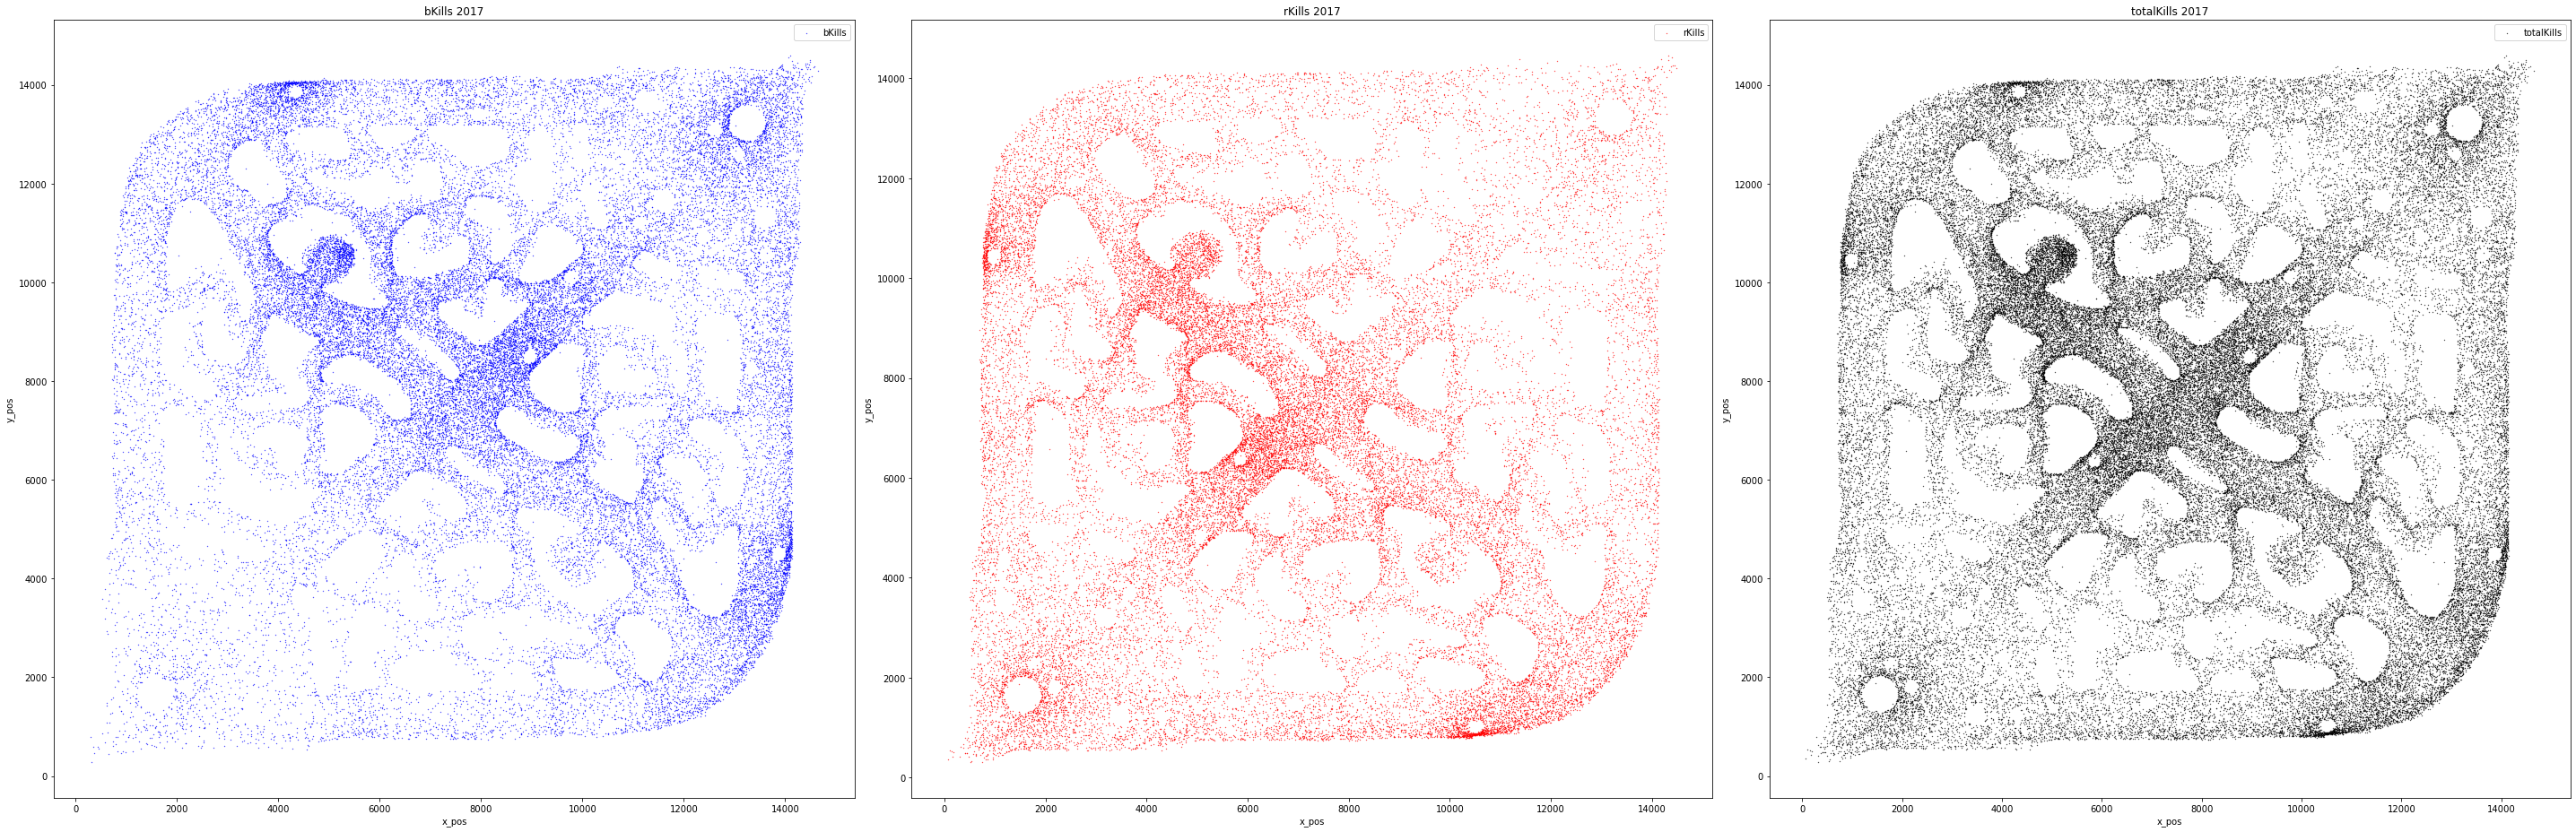

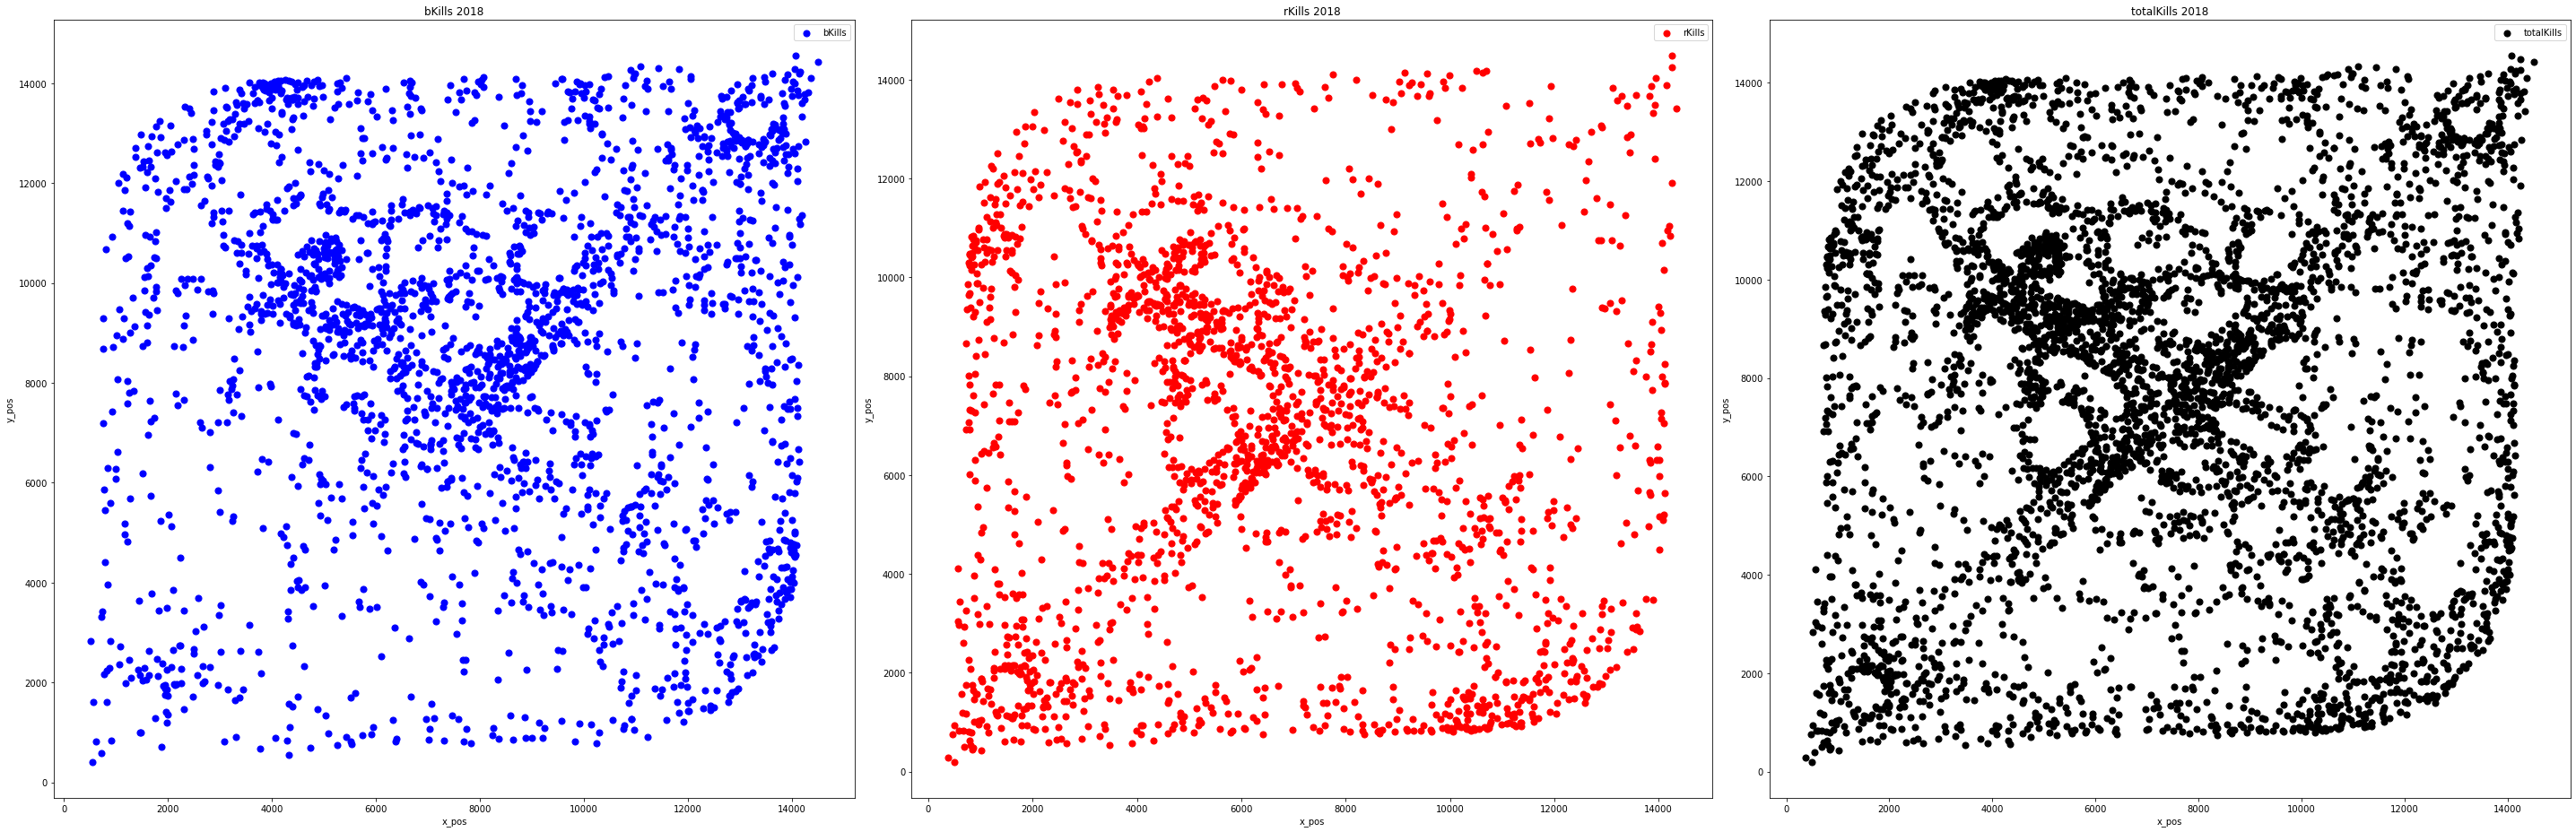

In [201]:
for year in kills_years:
    year_data = kills_with_year[kills_with_year['Year'] == year]

    # Split the DataFrame into bKills and rKills
    bKills = year_data[year_data['Team'] == 'bKills']
    rKills = year_data[year_data['Team'] == 'rKills']

    # Create a figure with two subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 13))

    # Plotting bKills in the first subplot
    ax1.scatter(bKills['x_pos'], bKills['y_pos'], color='blue', label='bKills', marker='o', s=s_years[year])
    ax1.set_xlabel('x_pos')
    ax1.set_ylabel('y_pos')
    ax1.set_title('bKills ' + str(year))
    ax1.legend()

    # Plotting rKills in the second subplot
    ax2.scatter(rKills['x_pos'], rKills['y_pos'], color='red', label='rKills', marker='o', s=s_years[year])
    ax2.set_xlabel('x_pos')
    ax2.set_ylabel('y_pos')
    ax2.set_title('rKills ' + str(year))
    ax2.legend()
    
    # Plotting totalKills in the third subplot
    ax3.scatter(year_data['x_pos'], year_data['y_pos'], color='black', label='totalKills', marker='o', s=s_years[year])
    ax3.set_xlabel('x_pos')
    ax3.set_ylabel('y_pos')
    ax3.set_title('totalKills ' + str(year))
    ax3.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()
